In [244]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [245]:
df = pd.read_csv('E:\Python\ML Projects\data\Airbnb_Data.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [246]:
df1 = df.copy()

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [248]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [249]:
df['has_reviews'] = df['review_scores_rating'].notnull().astype(int)
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())

In [250]:
df['host_response_rate'] = df['host_response_rate'].fillna(0)
df['host_experience_years'] = 2026 - pd.to_datetime(df['host_since']).dt.year

In [251]:
df['bathrooms'] = (
    df.groupby('room_type')['bathrooms'].transform(lambda x: x.fillna(x.median()))
)

In [252]:
df['bedrooms'] = (
    df.groupby('room_type')['bedrooms'].transform(lambda x:x.fillna(x.median()))
)

In [253]:
df['beds'] = (
    df.groupby('room_type')['beds'].transform(lambda x:x.fillna(x.median()))
)

In [254]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate            0
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating          0
thumbnail_url              8216
zipcode                     966
bedrooms                      0
beds                          0
has_reviews                   0
host_experience_years       188
dtype: i

In [255]:
df['neighbourhood'] = df['neighbourhood'].fillna('Unknown')
df['zipcode_missing'] = df['zipcode'].isnull().astype(int)

In [256]:
df['has_images'] = df['thumbnail_url'].notnull().astype(int)

In [257]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate            0
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood                 0
number_of_reviews             0
review_scores_rating          0
thumbnail_url              8216
zipcode                     966
bedrooms                      0
beds                          0
has_reviews                   0
host_experience_years       188
zipcode_

### Encoding Categorical Variable

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               74111 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [259]:
df['first_review']

0        2016-06-18
1        2017-08-05
2        2017-04-30
3               NaN
4        2015-05-12
            ...    
74106           NaN
74107    2016-08-15
74108    2015-01-03
74109           NaN
74110    2013-09-05
Name: first_review, Length: 74111, dtype: object

In [260]:
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)

OR <br>
cat_cols = df.select_dtypes(include=['object']).columns

In [261]:
cat_cols

['property_type',
 'room_type',
 'amenities',
 'bed_type',
 'cancellation_policy',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

In [262]:
df[cat_cols].nunique().sort_values(ascending=False)

description               73479
name                      73359
amenities                 67122
thumbnail_url             65883
host_since                 3087
first_review               2554
last_review                1371
zipcode                     769
neighbourhood               620
host_response_rate           81
property_type                35
city                          6
cancellation_policy           5
bed_type                      5
room_type                     3
instant_bookable              2
host_has_profile_pic          2
host_identity_verified        2
dtype: int64

In [263]:
cardinalitydf = pd.DataFrame({
    'Columns' : cat_cols,
    'unique_count' : df[cat_cols].nunique(),
    'unique_pct' : df[cat_cols].nunique() / len(df) * 100
}).sort_values(by='unique_count',ascending=False)


In [264]:
cardinalitydf

,Columns,unique_count,unique_pct
description,description,73479,99.147225
name,name,73359,98.985306
amenities,amenities,67122,90.569551
thumbnail_url,thumbnail_url,65883,88.897734
host_since,host_since,3087,4.165374
first_review,first_review,2554,3.446182
last_review,last_review,1371,1.849928
zipcode,zipcode,769,1.037633
neighbourhood,neighbourhood,620,0.836583
host_response_rate,host_response_rate,81,0.109296


In [265]:
df['description']

0        Beautiful, sunlit brownstone 1-bedroom in the ...
1        Enjoy travelling during your stay in Manhattan...
2        The Oasis comes complete with a full backyard ...
3        This light-filled home-away-from-home is super...
4        Cool, cozy, and comfortable studio located in ...
                               ...                        
74106                            one room in bushwick apt 
74107    Located on the Pacific Coast Highway, this apa...
74108    A modern apartment located in East Williamsbur...
74109    Fully renovated, designer's studio located in ...
74110    You will stay-aboard the Island Trader at one ...
Name: description, Length: 74111, dtype: object

In [266]:
df['name']

0                    Beautiful brownstone 1-bedroom
1          Superb 3BR Apt Located Near Times Square
2                                  The Garden Oasis
3                Beautiful Flat in the Heart of SF!
4                        Great studio in midtown DC
                            ...                    
74106                             one room bushwick
74107                  Spacious Hermosa 2 BR on PCH
74108    Modern 2 Bedroom Apartment in Williamsburg
74109          Designer's Apartment in HEART of NYC
74110                Cozy Boat at Shoreline Village
Name: name, Length: 74111, dtype: object

In [267]:
df['amenities']

0        {"Wireless Internet","Air conditioning",Kitche...
1        {"Wireless Internet","Air conditioning",Kitche...
2        {TV,"Cable TV","Wireless Internet","Air condit...
3        {TV,"Cable TV",Internet,"Wireless Internet",Ki...
4        {TV,Internet,"Wireless Internet","Air conditio...
                               ...                        
74106                                                   {}
74107    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
74108    {TV,Internet,"Wireless Internet","Air conditio...
74109    {TV,"Wireless Internet","Air conditioning",Kit...
74110    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, Length: 74111, dtype: object

In [268]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=500,
    stop_words='english'
)

desctfidf = tfidf.fit_transform(df['description'].fillna(''))

In [269]:
df = df.drop(columns=['name'])

In [270]:
df['amenities_count'] = df['amenities'].apply(
    lambda x: len(str(x).split(',')) if pd.notnull(x) else 0 
)

In [271]:
df = df.drop(columns=['thumbnail_url'])

In [272]:
df['host_since'] = pd.to_datetime(df['host_since'],errors='coerce')
df['first_review'] = pd.to_datetime(df['first_review'],errors='coerce')
df['last_review'] = pd.to_datetime(df['last_review'],errors='coerce')

In [273]:
reference = pd.Timestamp('today')

df['listing_age_days'] = (
    reference - df['host_since']
).dt.days

In [274]:
df['days_since_last_review'] = (
    reference - df['last_review']
).dt.days

In [275]:
df['zipcode']

0          11201
1          10019
2          10027
3        94117.0
4          20009
          ...   
74106    11206.0
74107      90254
74108    11206.0
74109      10011
74110      90802
Name: zipcode, Length: 74111, dtype: object

In [276]:
zipcode_freq = df['zipcode'].value_counts(normalize=True)
df['zipcode_freq'] = df['zipcode'].map(zipcode_freq)

In [277]:
neigh_freq = df['neighbourhood'].value_counts(normalize=True)
df['neighbourhood_freq'] = df['neighbourhood'].map(neigh_freq)

In [278]:
df['host_response_rate'] = (
    df['host_response_rate'].str.replace('%','',regex=False).astype(float)
)

In [279]:
df['host_response_rate'] = df['host_response_rate'].fillna(
    df['host_response_rate'].median()
)

In [280]:
'''
from sklearn.preprocessing import StandardScaler

df['host_response_rate_scaled'] = StandardScaler().fit_transform(
    df[['host_response_rate']]
)
'''

"\nfrom sklearn.preprocessing import StandardScaler\n\ndf['host_response_rate_scaled'] = StandardScaler().fit_transform(\n    df[['host_response_rate']]\n)\n"

In [281]:
df = pd.get_dummies(
    df,
    columns=['property_type'],
    drop_first=True
)

In [282]:
low_cards = cardinalitydf[cardinalitydf['unique_count'] < 10]['Columns'].tolist()
print(low_cards)

['city', 'cancellation_policy', 'bed_type', 'room_type', 'instant_bookable', 'host_has_profile_pic', 'host_identity_verified']


In [283]:
df = pd.get_dummies(
    df,
    columns=low_cards,
    drop_first=True
)

How to detect skewness

In [284]:
numcols = df.select_dtypes(include='number').columns
skewness = df[numcols].skew().sort_values(ascending=False)

skewness

zipcode_missing           8.586947
number_of_reviews         3.702835
bathrooms                 3.697098
beds                      3.360451
days_since_last_review    2.373867
neighbourhood_freq        2.269550
accommodates              2.231561
bedrooms                  1.991827
zipcode_freq              1.136479
amenities_count           0.789427
log_price                 0.514695
listing_age_days          0.476514
host_experience_years     0.461813
id                       -0.260616
longitude                -0.407100
latitude                 -0.534766
has_reviews              -1.312782
has_images               -2.478963
review_scores_rating     -3.948002
host_response_rate       -4.776564
dtype: float64

In [285]:
skewness_filtered = skewness[(skewness >= 1) & (skewness <= 4)]
skewness_filtered

number_of_reviews         3.702835
bathrooms                 3.697098
beds                      3.360451
days_since_last_review    2.373867
neighbourhood_freq        2.269550
accommodates              2.231561
bedrooms                  1.991827
zipcode_freq              1.136479
dtype: float64

In [286]:
skewedcols = skewness_filtered.keys()
skewedcols

Index(['number_of_reviews', 'bathrooms', 'beds', 'days_since_last_review',
       'neighbourhood_freq', 'accommodates', 'bedrooms', 'zipcode_freq'],
      dtype='object')

In [287]:
for col in skewedcols:
    df[col] = np.log1p(df[col])

In [288]:
numcols = df.select_dtypes(include=['int64', 'float64']).columns

ranges = df[numcols].max() - df[numcols].min()
print("Ranges of numeric features (sorted descending):")
print(ranges.sort_values(ascending=False))

print("\nDescriptive statistics for numeric features:")
df[numcols].describe().T[['min', 'max', 'std', 'mean']]

Ranges of numeric features (sorted descending):
id                        2.123056e+07
listing_age_days          3.502000e+03
host_response_rate        1.000000e+02
amenities_count           8.500000e+01
review_scores_rating      8.000000e+01
longitude                 5.152645e+01
latitude                  9.051533e+00
host_experience_years     9.000000e+00
log_price                 7.600402e+00
number_of_reviews         6.406880e+00
beds                      2.944439e+00
bedrooms                  2.397895e+00
bathrooms                 2.197225e+00
accommodates              2.140066e+00
days_since_last_review    7.189614e-01
neighbourhood_freq        8.866179e-02
zipcode_freq              1.851616e-02
dtype: float64

Descriptive statistics for numeric features:


,min,max,std,mean
id,344.000000,2.123090e+07,6.081735e+06,1.126662e+07
log_price,0.000000,7.600402e+00,7.173938e-01,4.782069e+00
accommodates,0.693147,2.833213e+00,4.285449e-01,1.323219e+00
bathrooms,0.000000,2.197225e+00,2.015382e-01,7.804066e-01
host_response_rate,0.000000,1.000000e+02,1.438911e+01,9.574654e+01
latitude,33.338905,4.239044e+01,3.080167e+00,3.844596e+01
longitude,-122.511500,-7.098505e+01,2.170532e+01,-9.239753e+01
number_of_reviews,0.000000,6.406880e+00,1.526999e+00,1.981081e+00
review_scores_rating,20.000000,1.000000e+02,6.943159e+00,9.450343e+01
bedrooms,0.000000,2.397895e+00,3.430267e-01,7.576430e-01


In [289]:
scalecols = [
    'host_response_rate',
    'longitude',
    'listing_age_days',
    'amenities_count', 
    'review_scores_rating'  
]

In [290]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[scalecols] = scaler.fit_transform(df[scalecols])

In [291]:
dropcol = [
    'id',
    'description',
]

df = df.drop(columns=dropcol)

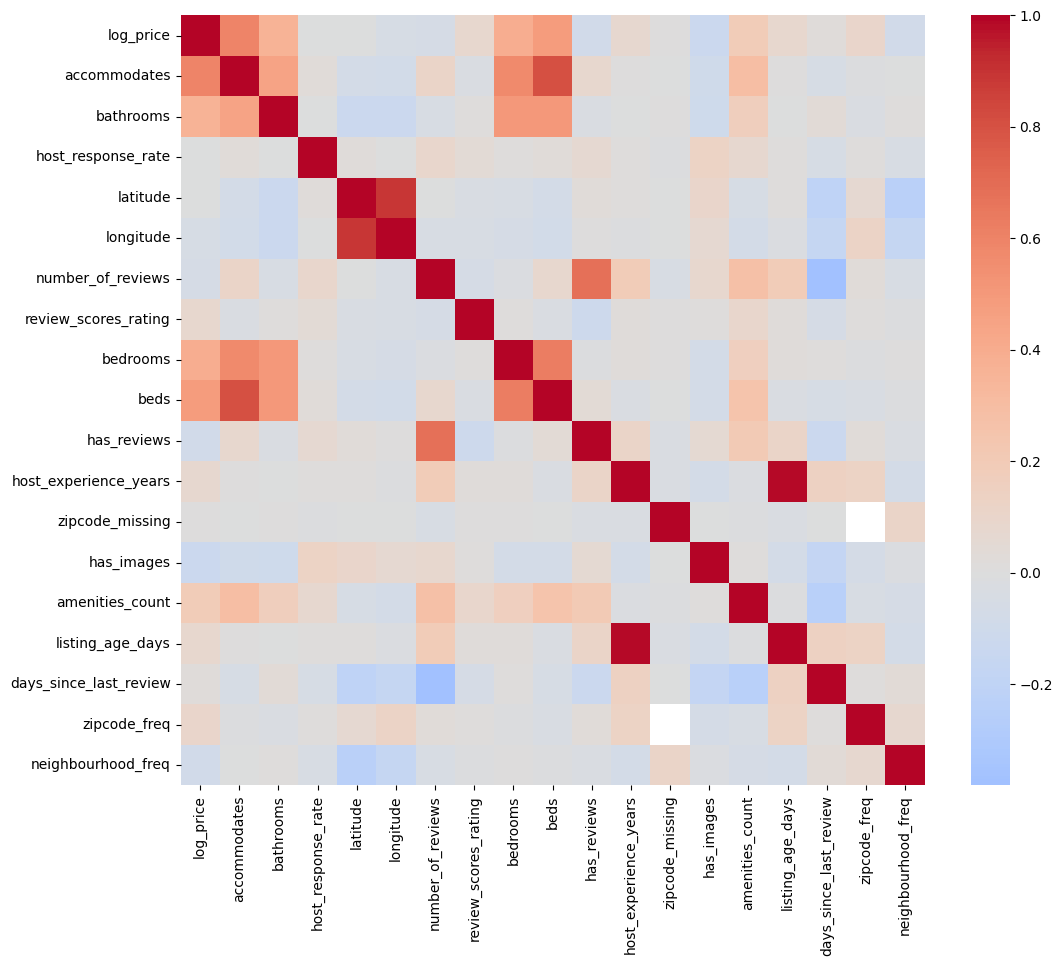

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,cmap='coolwarm',center=0)
plt.show()

In [293]:
highcorr = (
    corr.abs()
    .where(np.triu(np.ones(corr.shape),k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

highcorr[highcorr>0.6]

host_experience_years  listing_age_days    0.988554
latitude               longitude           0.896065
accommodates           beds                0.802184
number_of_reviews      has_reviews         0.684147
bedrooms               beds                0.622734
dtype: float64

In [294]:
df=df.drop(columns=['host_experience_years','beds','has_reviews'])

Variance Inflation Factor

In [295]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.select_dtypes(include='number').drop(columns=['log_price'])
x = x.fillna(x.median())
vifdf = pd.DataFrame()
vifdf['feature'] = x.columns
vifdf['VIF'] = [
    variance_inflation_factor(x.values,i)
    for i in range(x.shape[1])
]

vifdf.sort_values(by='VIF',ascending=False)

,feature,VIF
12,days_since_last_review,818.980907
3,latitude,790.451960
1,bathrooms,23.309629
0,accommodates,17.645508
7,bedrooms,9.957362
9,has_images,9.561498
4,longitude,5.156332
5,number_of_reviews,3.181628
13,zipcode_freq,2.602078
14,neighbourhood_freq,1.585981


In [296]:
coldrop = [
    'days_since_last_review',
    'latitude',
    'accommodates',
    'bathrooms',
    'has_images'
]

In [297]:
df = df.drop(columns=coldrop)

Recalculate VIF

In [298]:
x = df.select_dtypes(include='number').drop(columns='log_price')
x = x.fillna(x.median())

vifdf1 = pd.DataFrame()
vifdf1['feature'] = x.columns
vifdf1['VIF'] = [
    variance_inflation_factor(x.values,i)
    for i in range(x.shape[1])
]


vifdf1.sort_values(by='VIF',ascending=False)

,feature,VIF
4,bedrooms,2.795729
2,number_of_reviews,2.373864
8,zipcode_freq,2.246247
9,neighbourhood_freq,1.484737
6,amenities_count,1.090502
1,longitude,1.061651
7,listing_age_days,1.048365
5,zipcode_missing,1.029930
3,review_scores_rating,1.020708
0,host_response_rate,1.013356


Baseline Model - Linear Regression

In [299]:
df.columns

Index(['log_price', 'amenities', 'cleaning_fee', 'first_review',
       'host_response_rate', 'host_since', 'last_review', 'longitude',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode',
       'bedrooms', 'zipcode_missing', 'amenities_count', 'listing_age_days',
       'zipcode_freq', 'neighbourhood_freq', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Casa particular',
       'property_type_Castle', 'property_type_Cave', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Earth House', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Hut', 'property_type_In-law',
       'property_type_Island', 'property_type_Lighthouse',
       'property_type_Loft', 'property_type_Other',


In [300]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

x = df.select_dtypes(include='number').drop(columns='log_price')
y = df['log_price']

x = x.fillna(x.median())

xtrain , xtest , ytrain , ytest = train_test_split(
    x,y,test_size=0.2,random_state=42
)

lr = LinearRegression()
lr.fit(xtrain,ytrain)

ypredlr = lr.predict(xtest)

print('RMSE : ',mean_squared_error(ytest,ypredlr,squared=False))
print('R2 : ',r2_score(ytest,ypredlr))

RMSE :  0.6414607047212116
R2 :  0.19904400990678717


Regularized Linear Regression

In [301]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.01,l1_ratio=0.5)
enet.fit(xtrain,ytrain)

ypredenet = enet.predict(xtest)
print('RMSE:',mean_squared_error(ytest,ypredenet,squared=False))
print('R2:',r2_score(ytest,ypredenet))

RMSE: 0.649325575263072
R2: 0.1792827578107915


Random Forest

In [302]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=1
)

rf.fit(xtrain,ytrain)
ypredrf = rf.predict(xtest)

print('RMSE:',mean_squared_error(ytest,ypredrf,squared=False))
print('R2:',r2_score(ytest,ypredrf))

RMSE: 0.4839516669302179
R2: 0.5440969268042208


XGBoost

In [303]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(xtrain,ytrain)
ypredxgb = xgb.predict(xtest)

print('RMSE:',mean_squared_error(ytest,ypredxgb,squared=False))
print('R2:',r2_score(ytest,ypredxgb))

RMSE: 0.47653780463415296
R2: 0.5579582810774615


Improvements

Location Clustering

In [304]:
df.insert(6,'latitude',df1['latitude'])

In [305]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20,random_state=42)
x['location_cluster'] = kmeans.fit_predict(df[['latitude','longitude']])

c:\Users\rams6\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [306]:
x

,host_response_rate,longitude,number_of_reviews,review_scores_rating,bedrooms,zipcode_missing,amenities_count,listing_age_days,zipcode_freq,neighbourhood_freq,location_cluster
0,0.295605,0.847996,1.098612,0.791657,0.693147,0,-1.240094,1.280558,0.002867,0.001497,9
1,0.295605,0.848115,1.945910,-0.216536,1.386294,0,-0.375154,-1.608363,0.010540,0.017376,17
2,0.295605,0.850201,2.397895,-0.360564,0.693147,0,0.201472,-1.250082,0.008549,0.018370,8
3,0.295605,-1.383730,0.000000,0.215547,1.098612,0,-0.375154,-0.411070,0.002717,0.001672,2
4,0.295605,0.707800,1.609438,-7.850000,0.000000,0,-0.807624,-0.336995,0.012540,0.004013,3
...,...,...,...,...,...,...,...,...,...,...,...
74106,0.295605,0.850402,0.000000,0.215547,0.693147,0,-2.393347,0.731799,0.005807,0.037891,0
74107,0.295605,-1.197803,2.833213,-0.216536,1.098612,0,-0.230998,-0.985529,0.001298,0.001079,6
74108,0.295605,0.850265,3.784190,-0.072508,1.098612,0,1.931352,1.403009,0.005807,0.037891,0
74109,0.295605,0.847603,0.000000,0.215547,0.000000,0,-0.375154,-1.744418,0.001858,0.008144,0


Price efficiency features

In [307]:
df.insert(8,'accommodates',df1['accommodates'])

In [308]:
x['price_per_bedroom'] = df['log_price'] / (df['bedrooms']+1)
x['price_per_guest'] = df['log_price'] / (df['accommodates']+1)

Popularity Velocity

In [309]:
x['review_per_year'] = df['number_of_reviews'] / (df['listing_age_days']+1)

In [313]:
x=x.fillna(x.median())
xtrain , xtest , ytrain , ytest = train_test_split(
    x,y,test_size=0.2,random_state=42
)


Baseline Model

In [314]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

ypredlr1 = lr.predict(xtest)

print('Linear Regression:')
print('RMSE:',np.sqrt(mean_squared_error(ytest,ypredlr1)))
print('R2:',r2_score(ytest,ypredlr))


Linear Regression:
RMSE: 0.25481304934487153
R2: 0.19904400990678717


RandomForest

In [315]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=1
)

rf.fit(xtrain,ytrain)
ypredrf1 = rf.predict(xtest)

print('RandomForest:')
print('RMSE:',np.sqrt(mean_squared_error(ytest,ypredrf1)))
print('R2:',r2_score(ytest,ypredrf1))

RandomForest:
RMSE: 0.018285899916176247
R2: 0.9993491195661055


XGBoost

In [316]:
param_dist = {
    'max_depth':[4,6,8],
    'learning_rate':[0.03,0.05,1],
    'n_estimators':[500,800],
    'subsample':[0.7,0.8],
    'colsample_bytree':[0.7,0.8]
}

In [318]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgbmodel = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=1
)

search = RandomizedSearchCV(
    xgbmodel,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=1,
    random_state=42
)

search.fit(xtrain,ytrain)
bestxgb = search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [319]:
ypredxgb = bestxgb.predict(xtest)

print('XGBoost (Tuned):')
print('RMSE:',np.sqrt(mean_squared_error(ytest,ypredxgb)))
print('R2:',r2_score(ytest,ypredxgb))

XGBoost (Tuned):
RMSE: 0.0375154010519529
R2: 0.9972603964096625


High R2 value on RandomForest and XGB indicates there is a data leakage